In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# get all the data
def parse_data(name):
    with open("model/"+name+"/result.json") as f:
        data = json.load(f)
    return data

parse_data("unstackI5")

{u'5blocks': {u'mean': 0.747, u'std': 0.108},
 u'6blocks': {u'mean': 0.607, u'std': 0.151},
 u'7blocks': {u'mean': 0.407, u'std': 0.356},
 u'shuffle bottom2': {u'mean': 0.851, u'std': 0.071},
 u'shuffle top2': {u'mean': 0.847, u'std': 0.084},
 u'train': {u'mean': 0.844, u'std': 0.075}}

In [3]:
NN = {}
NN["unstack"] = parse_data("nnunstackI3")
nn_df = pd.DataFrame(NN["unstack"])
nn_df.transpose()

DILP = {}
DILP["unstack"] = parse_data("unstackI5")
dilp_df = pd.DataFrame(DILP["unstack"])
dilp_df.transpose()

Random = {}
Random["unstack"] = parse_data("ranunstack")
rand_df = pd.DataFrame(Random["unstack"])

data = pd.concat([dilp_df.transpose(), nn_df.transpose(), rand_df.transpose()], keys=["DILP", "NN", "Random"])
data["mean"]
data["mean"]

DILP    5blocks            0.747
        6blocks            0.607
        7blocks            0.407
        shuffle bottom2    0.851
        shuffle top2       0.847
        train              0.844
NN      5blocks           -0.959
        6blocks            -0.98
        7blocks            -0.98
        shuffle bottom2    -0.98
        shuffle top2       -0.98
        train               0.94
Random  5blocks            -0.96
        6blocks            -0.98
        7blocks            -0.98
        shuffle bottom2   -0.797
        shuffle top2      -0.785
        train             -0.822
Name: mean, dtype: object

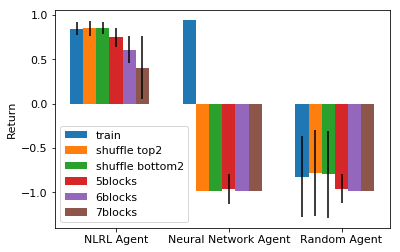

In [9]:
plt.rcParams.update({'font.size': 11})
ind = np.array([0.0, 3.0, 6.0])  # the x locations for the groups
width = 0.35       # the width of the bars
tasks = ["train", "swap top 2", "2 columns", "5 blocks", "6 blocks", "7 blocks"]

fig, ax = plt.subplots()
rects = []

for i, task in enumerate(tasks):
    rects.append(ax.bar(ind+width*i, data["mean"].loc[:,task], width, yerr=data["std"].loc[:,task])[0])

ax.set_ylabel('Return')
ax.set_xticks(ind + width*3)
ax.set_xticklabels(('NLRL Agent', 'Neural Network Agent', "Random Agent"))

ax.legend(rects, tasks)

plt.show()

In [14]:
def plot(task, name, variations):
    dilp_df = pd.DataFrame(parse_data(name[0]))[variations]
    nn_df = pd.DataFrame(parse_data(name[1]))[variations]
    rand_df = pd.DataFrame(parse_data(name[2]))[variations]
    data = pd.concat([dilp_df.transpose(), nn_df.transpose(), rand_df.transpose()], keys=["DILP", "NN", "Random"])
    plt.rcParams.update({'font.size': 11})
    ind = np.array([0.0, 3.0, 6.0])  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects = []

    for i, variation in enumerate(variations):
        rects.append(ax.bar(ind+width*i, data["mean"].loc[:,variation], width, yerr=data["std"].loc[:,variation])[0])

    ax.set_ylabel('Return')
    ax.set_xticks(ind + width*3)
    ax.set_xticklabels(('NLRL Agent', 'Neural Network Agent', "Random Agent"))

    ax.legend(rects, variations)
    return data
    
d1 = plot("unstack", ["unstackI17", "nnunstackI2", "ranunstack"],
     ["train", "swap top 2", "2 columns", "5 blocks", "6 blocks", "7 blocks"])
d2 = plot("stack", ["stackI4", "nnstackI5", "ranstack"],
     ["train", "swap right 2", "2 columns", "5 blocks", "6 blocks", "7 blocks"])
d3 = plot("on", ["onI22", "nnonI2", "ranon"],
     ["train", "swap top 2", "swap middle 2", "5 blocks", "6 blocks", "7 blocks"])
d4 = plot("cliff walking", ["cliI36", "nncliI6", "rancli"],
     ["train", "top left", "top right", "center", "6 by 6", "7 by 7"])
# plt.show()
all_data = pd.concat([d1, d2, d3, d4], keys=["UNSTACK", "STACK", "ON", "Cliff-walking"])
all_data


distribution  \
UNSTACK       DILP   train          {u'0.9': 6, u'0.94': 439, u'0.88': 1, u'0.92':...   
                     swap top 2     {u'0.9': 10, u'0.94': 426, u'0.88': 3, u'0.92'...   
                     2 columns      {u'0.9': 1, u'0.94': 30, u'0.96': 466, u'0.92'...   
                     5 blocks       {u'0.9': 104, u'0.88': 13, u'0.86': 2, u'0.92'...   
                     6 blocks       {u'0.9': 329, u'0.88': 127, u'0.86': 37, u'0.8...   
                     7 blocks       {u'0.8': 1, u'0.88': 275, u'0.86': 154, u'0.84...   
              NN     train                                             {u'0.94': 200}   
                     swap top 2     {u'0.07999999999999985': 1, u'-0.9800000000000...   
                     2 columns      {u'0.15999999999999992': 1, u'-0.9800000000000...   
                     5 blocks                           {u'-0.9800000000000001': 200}   
                     6 blocks                           {u'-0.9800000000000001': 200}   
                     7 blocks                           {u'-0.9800000000000001': 200}   
              Random train          {u'-0.9800000000000001': 438, u'0.099999999999...   
                     swap top 2     {u'-0.9800000000000001': 442, u'0.099999999999...   
                     2 columns      {u'0.9': 3, u'0.8': 7, u'-0.9800000000000001':...   
                     5 blocks       {u'-0.9800000000000001': 488, u'0.279999999999...   
                     6 blocks                           {u'-0.9800000000000001': 500}   
                     7 blocks                           {u'-0.9800000000000001': 500}   
STACK         DILP   train          {u'0.9': 91, u'0.8': 5, u'0.8200000000000001':...   
                     swap right 2   {u'0.9': 88, u'0.8': 6, u'0.8200000000000001':...   
                     2 columns      {u'0.9': 48, u'0.8': 12, u'0.92': 83, u'0.8200...   
                     5 blocks       {u'0.9': 144, u'0.8': 5, u'0.8200000000000001'...   
                     6 blocks       {u'0.9': 166, u'0.8': 9, u'-0.9800000000000001...   
                     7 blocks       {u'0.45999999999999996': 1, u'0.8': 21, u'-0.9...   
              NN     train                                             {u'0.94': 500}   
                     swap right 2                       {u'-0.9800000000000001': 500}   
                     2 columns                          {u'-0.9800000000000001': 500}   
                     5 blocks                           {u'-0.9800000000000001': 500}   
                     6 blocks                           {u'-0.9800000000000001': 500}   
                     7 blocks                           {u'-0.9800000000000001': 500}   
...                                                                               ...   
ON            NN     train                                             {u'0.92': 200}   
                     swap top 2                         {u'-0.9800000000000001': 200}   
                     swap middle 2                      {u'-0.9800000000000001': 200}   
                     5 blocks                           {u'-0.9800000000000001': 200}   
                     6 blocks                           {u'-0.9800000000000001': 200}   
                     7 blocks                           {u'-0.9800000000000001': 200}   
              Random train          {u'0.8': 1, u'-0.9800000000000001': 443, u'0.0...   
                     swap top 2     {u'0.8': 1, u'-0.9800000000000001': 439, u'0.0...   
                     swap middle 2  {u'-0.9800000000000001': 452, u'0.099999999999...   
                     5 blocks       {u'0.29999999999999993': 1, u'-0.9800000000000...   
                     6 blocks       {u'0.36': 1, u'-0.9800000000000001': 498, u'0....   
                     7 blocks                           {u'-0.9800000000000001': 500}   
Cliff-walking DILP   train          {u'0.8': 3, u'0.8200000000000001': 3, u'0.72':...   
                     top left       {u'0.8': 15, u'0.639999999999999

In [67]:
def to_text(data):
    return str(data["mean"])+"±"+str(data["std"])

all_data["text"] = all_data.apply(to_text, axis=1)
index = all_data.loc(axis=0)[:,"DILP"].index
index = [index.get_level_values(0), index.get_level_values(2)]
print(all_data["text"].unstack(level=1).reindex(index).to_latex())

\begin{tabular}{lllll}
\toprule
              &           &         DILP &            NN &        Random \\
\midrule
UNSTACK & train &  0.937±0.008 &      0.94±0.0 &  -0.807±0.466 \\
              & swap top 2 &  0.936±0.009 &   -0.94±0.232 &  -0.827±0.428 \\
              & 2 columns &  0.958±0.006 &  -0.852±0.414 &   -0.522±0.71 \\
              & 5 blocks &   0.915±0.01 &     -0.98±0.0 &  -0.948±0.208 \\
              & 6 blocks &  0.891±0.014 &     -0.98±0.0 &     -0.98±0.0 \\
              & 7 blocks &  0.868±0.016 &     -0.98±0.0 &     -0.98±0.0 \\
STACK & train &   0.91±0.033 &      0.94±0.0 &  -0.292±0.759 \\
              & swap right 2 &  0.913±0.029 &     -0.98±0.0 &   -0.24±0.739 \\
              & 2 columns &  0.897±0.064 &     -0.98±0.0 &  -0.215±0.772 \\
              & 5 blocks &  0.891±0.032 &     -0.98±0.0 &  -0.718±0.542 \\
              & 6 blocks &  0.856±0.169 &     -0.98±0.0 &  -0.905±0.307 \\
              & 7 blocks &  0.828±0.179 &     -0.98±0.0 &  -0.973±0.09